In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
delivery = pd.read_csv("datasets/delivery.csv")

In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
n.prod      25 non-null int64
distance    25 non-null int64
delTime     25 non-null float64
dtypes: float64(1), int64(2)
memory usage: 680.0 bytes


In [6]:
delivery.describe()

,n.prod,distance,delTime
count,25.000000,25.000000,25.000000
mean,8.760000,409.280000,22.384000
std,6.881618,325.188089,15.524903
min,2.000000,36.000000,8.000000
25%,4.000000,150.000000,13.750000
50%,7.000000,330.000000,18.110000
75%,10.000000,605.000000,21.500000
max,30.000000,1460.000000,79.240000


In [7]:
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


#### Visualizing the Delivery Time Dataset

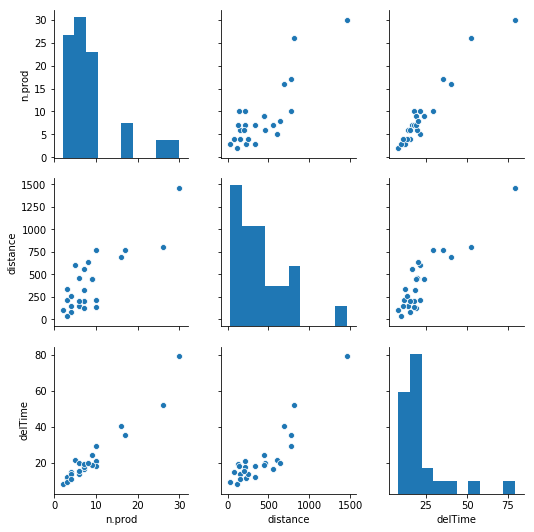

In [8]:
sns.pairplot(delivery)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
model.fit(X,y)
print("Intercept:", model.intercept_,"\nCoefficients:",model.coef_)

Intercept: 2.3412311451922037 
Coefficients: [1.61590721 0.01438483]


#### Visualizing Multiple Linear Regression Model

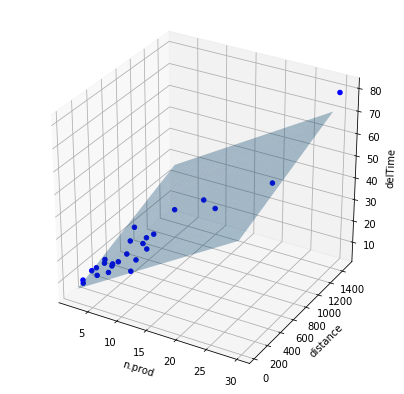

In [13]:
from mpl_toolkits.mplot3d import Axes3D
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4)

#### Validating the Assumption of Linearity

Text(0.5, 1.0, 'Residual plot')

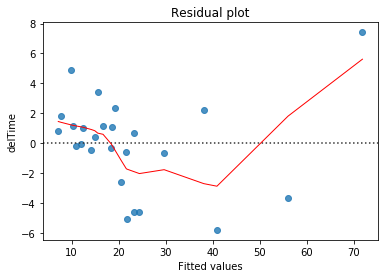

In [16]:
predictions = model.predict(delivery[["n.prod","distance"]])
sns.residplot(predictions.reshape(-1),'delTime', data=delivery,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

#### Validating the Assumption of Normality

Text(0.5, 1.0, 'Normal Q-Q Plot')

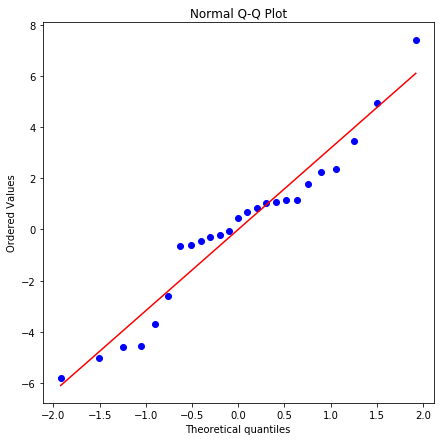

In [17]:
residuals = delivery["delTime"] - predictions.reshape(-1)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

#### Validating the Assumption of Homoscedasticity

Text(0.5, 0, 'Fitted value')

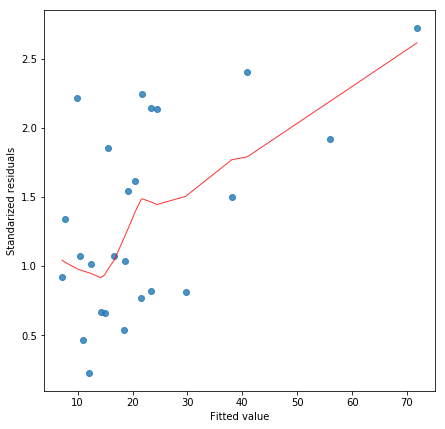

In [20]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))
plt.figure(figsize=(7,7))
sns.regplot(predictions.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

#### correlation among the variables n.prod and distance

In [21]:
np.corrcoef(delivery["n.prod"],delivery["distance"])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

#### VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Adding a constant column for the intercept. 
X1 = add_constant(X)
vif = pd.Series([variance_inflation_factor(X1.values,idx) 
           for idx in range(X1.shape[1])],
          index=X1.columns)
print(vif)

const       2.830380
n.prod      3.118474
distance    3.118474
dtype: float64


#### Coefficient of Determination

In [24]:
model.score(X,y)

0.9595937494832257

#### R-squared and Adjusted R-squared

In [25]:
# Linear regression with Single predictor
model = LinearRegression()
X = delivery[["n.prod"]]
y = delivery["delTime"]
model.fit(X,y)
model.score(X,y)  # R-Squared value

0.9304813135986856

In [26]:
# Linear regression with additional predictor
model = LinearRegression()
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
model.fit(X,y)
model.score(X,y)  # R-Squared value

0.9595937494832257

#### using statsmodels

In [28]:
import statsmodels.api as sm
X = sm.add_constant(delivery[["n.prod","distance"]])
y = delivery["delTime"]
model = sm.OLS(y,X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delTime   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           4.69e-16
Time:                        10:38:34   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3412      1.097      2.135      0.044       0.067       4.616
n.prod         1.6159      0.171      9.464      0.000       1.262       1.970
distance       0.0144      0.004      3.981      0.001       0.007       0.022
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.010
Skew:                           0.032   Prob(JB):                        0.995
Kurtosis:                       3.073   Cond. No.                         873.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""